In [1]:
install.packages("e1071")
install.packages("caret")
library(e1071)
library(caret)


?s sont dans
	/var/folders/hj/xknsfbyn3812mccyt1jqctmc0000gn/T//RtmpV8VHGT/downloaded_packages

?s sont dans
	/var/folders/hj/xknsfbyn3812mccyt1jqctmc0000gn/T//RtmpV8VHGT/downloaded_packages


Warning message in sprintf(gettext(fmt, domain = domain, trim = trim), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'e1071'"
Le chargement a n'ecessit'e le package : ggplot2

Le chargement a n'ecessit'e le package : lattice



In [2]:
data(iris)

In [3]:
head(iris)
summary(iris)
str(iris)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
set.seed(123)
trainIndex <- sample(1:nrow(iris), 0.7 * nrow(iris))
iris_train <- iris[trainIndex, ]
iris_test <- iris[-trainIndex, ]


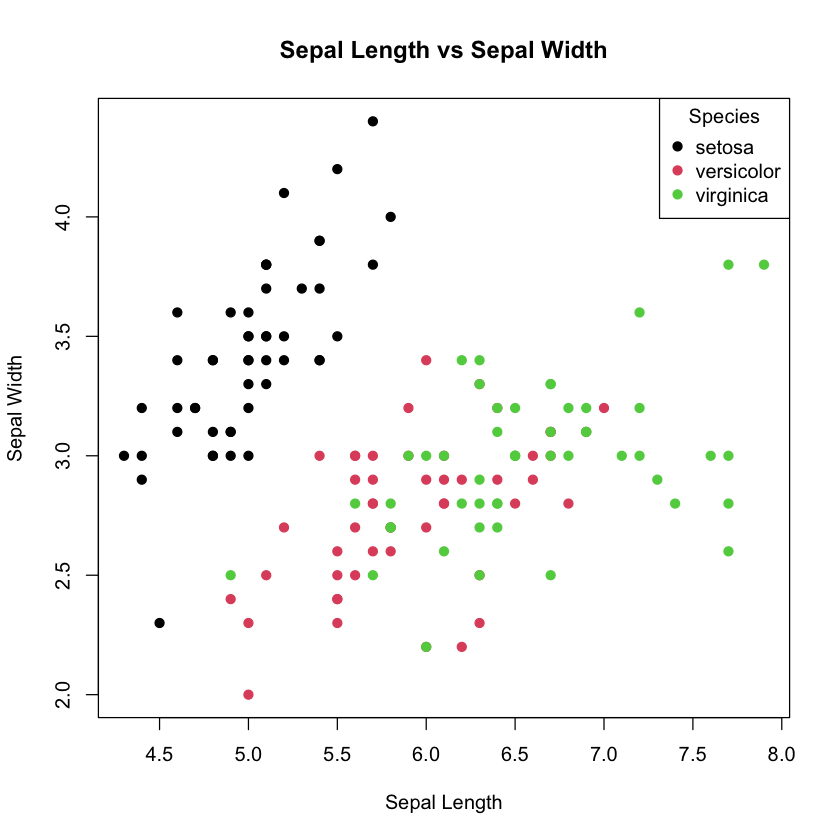

In [5]:
# Plotting Sepal Length vs Sepal Width with Species as color and point type
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species, pch = 19, main = "Sepal Length vs Sepal Width", xlab = "Sepal Length", ylab = "Sepal Width")

# Adding Legend
legend("topright", legend = levels(iris$Species), col = unique(iris$Species), pch = 19, title = "Species")


In [6]:
model <- svm(Species ~ ., data = iris_train, kernel = "linear", cost = 0.1, scale = TRUE)


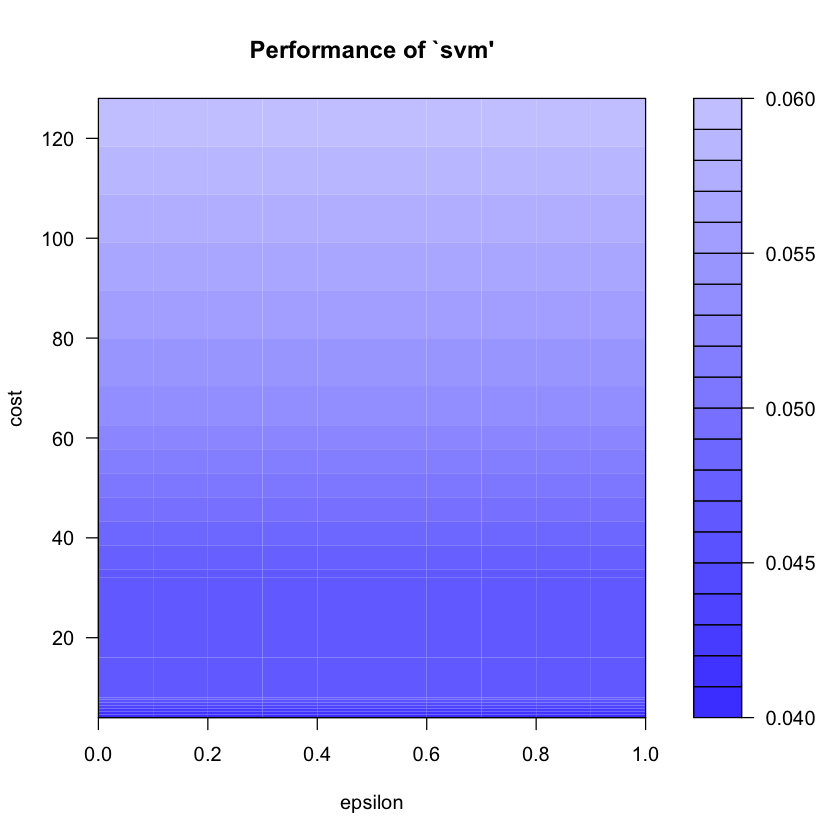

In [7]:
set.seed(123)
tuned_model <- tune(svm, Species ~ ., data = iris, ranges = list(epsilon = seq(0, 1, 0.1), cost = 2^(2:7)))
plot(tuned_model)

In [8]:
predicted <- predict(model, iris_test[, -5])
confusionMatrix(table(predicted, iris_test$Species))


Confusion Matrix and Statistics

            
predicted    setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         18         1
  virginica       0          0        12

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9662          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9231
Specificity                 1.0000            0.9630           1.0000
Pos Pred Value              1.0000            0.9474           1.0000
Neg Pred Value              1.0000            1.0000           0.9697
Prevalence